In [1]:
# Importing neccessary Modules of Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#setting graphs to show in jupyter
%matplotlib inline

#to set seaborn graphs to better style
sns.set(style='ticks')

# 1. Importing the necessary data files and Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [2]:
customers= pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Python Foundation Basic Case Study 1 - Retail Case Study/Customer.csv')
prod_cat_info= pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Python Foundation Basic Case Study 1 - Retail Case Study/prod_cat_info.csv')
transactions= pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Python Foundation Basic Case Study 1 - Retail Case Study/Transactions.csv')

In [3]:
#renaming the prod_sub_cat_code to prod_subcat_code same as in transactions data
prod_cat_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'}, inplace=True)

In [4]:
#merging the transaction aand prod cat table first
Tran_prod_ct=pd.merge(left=transactions, right=prod_cat_info, on=['prod_cat_code','prod_subcat_code'],how= 'left')
Tran_prod_ct.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [5]:
# Renaming the column customer_id in customer table to cust_id same as in transaction table
customers.rename(columns={'customer_Id':'cust_id'}, inplace=True)

In [6]:
# Now merging the customers and Trans_prod_ct tables together
Customers_Final=pd.merge(left=Tran_prod_ct, right=customers, on=['cust_id'], how='left')
Customers_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0


# 2. Prepare a summary report for the merged data set.
 

In [7]:
# a. Get the column names and their corresponding data types
Customers_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [8]:
# b.1. Top 10 observations
Customers_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


In [9]:
# b.2. Bottom 10 observations
Customers_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,15-01-1982,M,1.0


In [10]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customers_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [11]:
# d. Frequency tables for all the categorical variables
Customers_Final.loc[:,Customers_Final.dtypes=='object'].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


# 3. Part-1: Generate histograms for all continuous variables and frequency bars for categorical variables.

In [12]:
customer_cont=Customers_Final.loc[:,['cust_id','Qty','Rate','Tax','total_amt','prod_subcat_code','prod_cat_code','city_code']]
customer_cont

,cust_id,Qty,Rate,Tax,total_amt,prod_subcat_code,prod_cat_code,city_code
0,270351,-5,-772,405.300,-4265.300,1,1,5.0
1,270384,-5,-1497,785.925,-8270.925,5,3,8.0
2,273420,-2,-791,166.110,-1748.110,6,5,8.0
3,271509,-3,-1363,429.345,-4518.345,11,6,3.0
4,273420,-2,-791,166.110,-1748.110,6,5,8.0
...,...,...,...,...,...,...,...,...
23048,274550,1,1264,132.720,1396.720,12,5,7.0
23049,270022,1,677,71.085,748.085,4,1,9.0
23050,271020,4,1052,441.840,4649.840,2,6,8.0
23051,270911,3,1142,359.730,3785.730,11,5,2.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

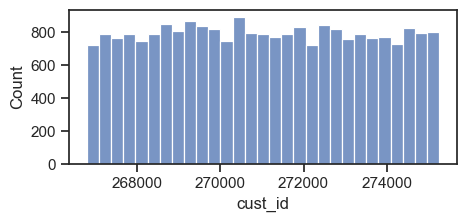

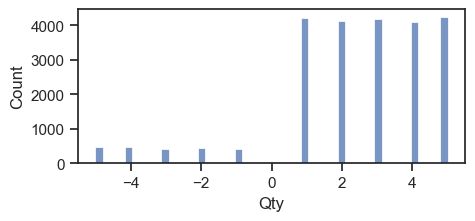

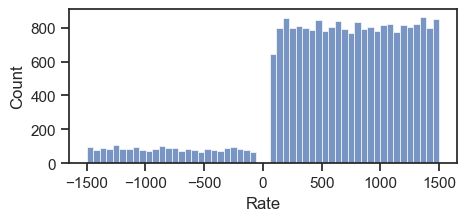

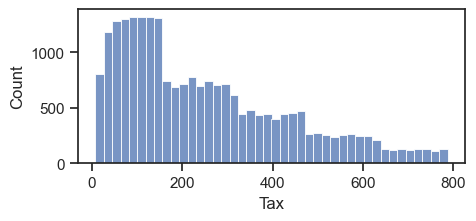

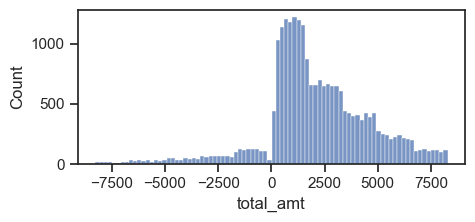

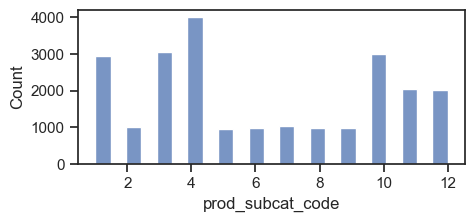

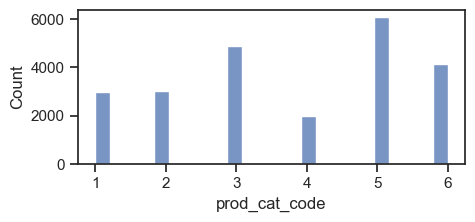

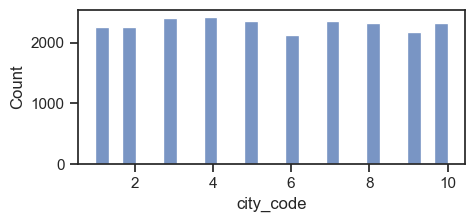

In [13]:
for var1 in customer_cont.columns:
    plt.figure(figsize=(5,2))
    sns.histplot(data=customer_cont[var1], fill=True)

# 3. Part-2: Frequency bars for categorical variables

In [14]:
Customers_Final.DOB=pd.to_datetime(Customers_Final.DOB, format='mixed')

In [15]:
Customers_Final.tran_date=pd.to_datetime(Customers_Final.tran_date, format='mixed')

In [16]:
cust_cat=Customers_Final.loc[:,Customers_Final.dtypes=='object']
cust_cat

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


In [17]:
cust_cat.dtypes

Store_type     object
prod_cat       object
prod_subcat    object
Gender         object
dtype: object

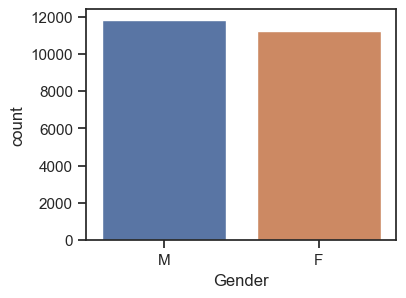

In [18]:
plt.figure(figsize=(4,3))
sns.countplot(x='Gender',data=cust_cat)
plt.show()

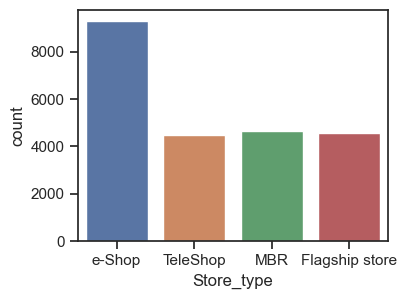

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(x='Store_type',data=cust_cat)
plt.show()

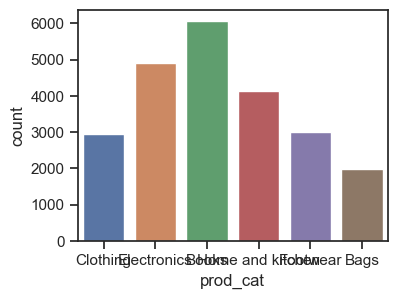

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(x='prod_cat',data=cust_cat)
plt.show()

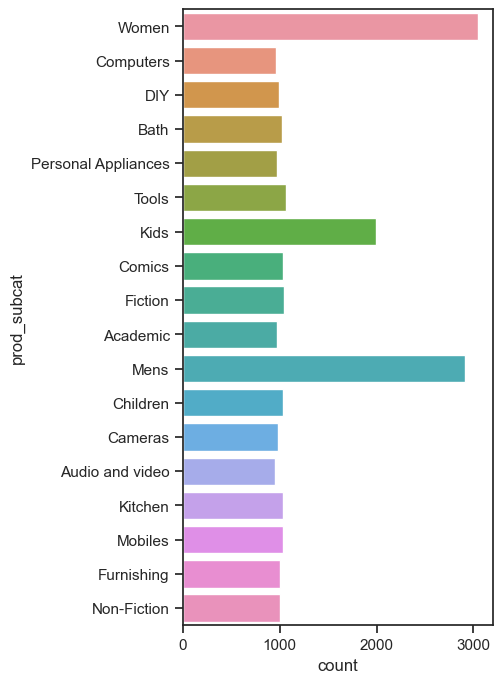

In [21]:
plt.figure(figsize=(4,8))
sns.countplot(y='prod_subcat', data=cust_cat)
plt.show()

# 4.a. Time Period of the available transaction data

In [22]:
print('The transaction data is available from {} to {}'.format(Customers_Final['tran_date'].min(),Customers_Final['tran_date'].max()))


The transaction data is available from 2011-01-02 00:00:00 to 2014-12-02 00:00:00


# 4.b. Count of transactions where total amount of transaction is negative.

In [23]:
Customers_Final.duplicated().sum()

13

In [24]:
Customers_Final.drop_duplicates(inplace=True)

In [25]:
Customers_Final.duplicated().sum()

0

In [26]:
Customers_Final[Customers_Final.total_amt<0].transaction_id.count()

2164

# 5. Analyze which product categories are more popular among mals vs females customers.

In [27]:
Customers_Final.groupby(['Gender','prod_cat']).Qty.sum().reset_index()

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


#  6. Which City code has the maximum customers and what are the percentage of customers from that city?

In [28]:
Customers_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0


In [29]:
# City with most cutomers
Customers_Final.groupby('city_code').cust_id.count().sort_values(ascending=False).head(1)

city_code
4.0    2422
Name: cust_id, dtype: int64

In [30]:
# percentage of customers for city with most customers
(Customers_Final.groupby('city_code').cust_id.count().sort_values(ascending=False).head(1)/Customers_Final.cust_id.count())*100

city_code
4.0    10.512153
Name: cust_id, dtype: float64

# 7. Which store type sells the maximum products by value and by quantity?

In [31]:
# store type to sell maximum products by quantity
Customers_Final.groupby('Store_type').Qty.sum().sort_values(ascending =False).head(1)

Store_type
e-Shop    22790
Name: Qty, dtype: int64

In [32]:
# store type to sell maximum products by value
Customers_Final.groupby('Store_type').Rate.sum().sort_values(ascending =False).head(1)

Store_type
e-Shop    5945770
Name: Rate, dtype: int64

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship store?

In [33]:
Customers_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


In [34]:
Customers_Final[(Customers_Final.Store_type=='Flagship store') & (Customers_Final.prod_cat=='Electronics')].total_amt.sum()

2215136.04

In [35]:
Customers_Final[(Customers_Final.Store_type=='Flagship store') & (Customers_Final.prod_cat=='Clothing')].total_amt.sum()

1194423.23

# 9. What was the total amount earned from 'male' customers under the 'Electronics' category?

In [36]:
Customers_Final[(Customers_Final.Gender=='M') & (Customers_Final.prod_cat=='Electronics')].total_amt.sum()

5711351.62

# 10. How many transactions have more than 10 unique transactions, after removing all the transations which have any negative amounts?

In [37]:
# new datafrme with no negative amounts

new_trans=Customers_Final.loc[Customers_Final.total_amt>0]
new_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0


In [38]:
# grouping the data to get unique transaction data
trans_unique=new_trans.groupby(['cust_id','prod_cat','prod_subcat']).transaction_id.count().reset_index()
trans_unique

,cust_id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [39]:
#custoemrs with more than 10 unique transactions
trans_unique.groupby('cust_id').transaction_id.count().sort_values(ascending=False)

cust_id
270908    10
272286    10
274854    10
273014    10
268076     9
          ..
270259     1
270265     1
267996     1
272656     1
269114     1
Name: transaction_id, Length: 5506, dtype: int64

There are no customers with more than 10 unique transactions

# 11. For all customers age between 25-35, find out:

# a. What was the total amount spent for "Electronics" and "Books" categories?

In [100]:
# function to create a new column "Age"
def calc_age(dob):
    today=dt.date.today()
    return today.year - dob.year - ((today.month,today.day) < (dob.month, dob.day))

In [101]:
Customers_Final['Age']=Customers_Final['DOB'].apply(calc_age)

In [102]:
Customers_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,50
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0,42
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31


In [120]:
# Adding another column to show age category
Customers_Final['Age_cat']=np.where(Customers_Final.Age.between(25,35),'25-35',Customers_Final['Age_cat'])
Customers_Final['Age_cat']=np.where(Customers_Final.Age.between(36,46),'36-46',Customers_Final['Age_cat'])
Customers_Final['Age_cat']=np.where(Customers_Final.Age.between(47,57),'47-57',Customers_Final['Age_cat'])
Customers_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,42,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,50,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0,42,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31,25-35


In [122]:
Customers_Final.groupby(['Age_cat','prod_cat']).total_amt.sum().loc['25-35',['Books', 'Electronics']]

Age_cat  prod_cat   
25-35    Books          2475954.715
         Electronics    2086183.645
Name: total_amt, dtype: float64

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [123]:
# collecting the data belonging to age group of 25-35

Data_25_35=Customers_Final[Customers_Final.Age_cat=='25-35']

In [125]:
# extracting the data belonging to transaction date between 1st Jan, 2014 and 1st Mar, 2014.
New_range=Customers_Final[(Customers_Final.tran_date >= '2014-01-01') & (Customers_Final.tran_date <= '2014-03-01')]
New_range.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,42,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,50,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0,42,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,31,25-35


In [126]:
New_range.total_amt.sum()

1409397.665